As of 30 March 2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)
import random
import time
import warnings
import statsmodels.api as sm
import geopandas as gpd
from shapely.geometry import Point
import requests
from bs4 import BeautifulSoup

%matplotlib inline
warnings.filterwarnings('ignore')


In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

In [3]:
#!kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset


In [4]:
df_usreal = pd.read_csv('realtor-data.zip.csv')

## description 

In [5]:
df_usreal

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In [6]:
len(df_usreal['city'].unique())


20099

In [7]:
df_usreal['status'].value_counts()

status
for_sale          1389306
sold               812009
ready_to_build      25067
Name: count, dtype: int64

In [8]:
#df_s = df_usreal[df_usreal['status'] == 'sold'].groupby(['state', 'city'])['status'].count().nlargest(20).reset_index()
#df_s

In [9]:
df_sold = df_usreal[df_usreal['status'] == 'sold']
df_s = df_sold.groupby(['state', 'city'])['status'].count().nlargest(20).reset_index()

df_s

,state,city,status
0,Texas,Houston,12901
1,Arizona,Tucson,5968
2,Illinois,Chicago,5550
3,California,San Diego,5043
4,North Carolina,Charlotte,5022
5,Texas,Dallas,5010
6,Arizona,Phoenix,4908
7,Florida,Jacksonville,4819
8,California,Los Angeles,4695
9,Missouri,Saint Louis,4511


In [10]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

# Initialize the geocoder
geolocator = Nominatim(user_agent=headers['User-Agent'])

# Empty list to hold geocoding results
geocoded_results = []

for location in df_s['city'] + ', ' + df_s['state']:
    # Geocode the location
    result = geolocator.geocode(location)
    
    # If the result is not None, add it to the list
    if result:
        geocoded_results.append(result)
        
    # Print status every 20 geocodes
    if len(geocoded_results) % 20 == 0:
        print(f'Geocoded {len(geocoded_results)} locations')
        
    # Pause for a second to ensure we don't overload the geocoding service
    time.sleep(1)
    
# Create a DataFrame from the geocoded results
df_geocoded = pd.DataFrame(geocoded_results)

# Display the geocoded results
df_geocoded

Geocoded 20 locations


,0,1
0,"Houston, Harris County, Texas, United States","(29.7589382, -95.3676974)"
1,"Tucson, Pima County, Arizona, United States","(32.2228765, -110.974847)"
2,"Chicago, Cook County, Illinois, United States","(41.8755616, -87.6244212)"
3,"San Diego, San Diego County, California, Unite...","(32.7174202, -117.162772)"
4,"Charlotte, Mecklenburg County, North Carolina,...","(35.2272086, -80.8430827)"
5,"Dallas, Dallas County, Texas, United States","(32.7762719, -96.7968559)"
6,"Phoenix, Maricopa County, Arizona, United States","(33.4484367, -112.074141)"
7,"Jacksonville, Duval County, Florida, United St...","(30.3321838, -81.655651)"
8,"Los Angeles, Los Angeles County, California, U...","(34.0536909, -118.242766)"
9,"Saint Louis, Missouri, United States","(38.6280278, -90.1910154)"


In [11]:
df_for_sale = df_usreal[df_usreal['status'] == 'for_sale']
df_fs = df_for_sale.groupby(['state', 'city'])['status'].count().nlargest(20).reset_index()
df_fs

,state,city,status
0,Illinois,Chicago,12688
1,Texas,Houston,10618
2,New York,New York City,8248
3,Pennsylvania,Philadelphia,8133
4,Texas,San Antonio,6486
5,Florida,Miami,5932
6,New York,New York,5297
7,New York,Brooklyn,4826
8,Florida,Jacksonville,4587
9,Florida,Naples,4541


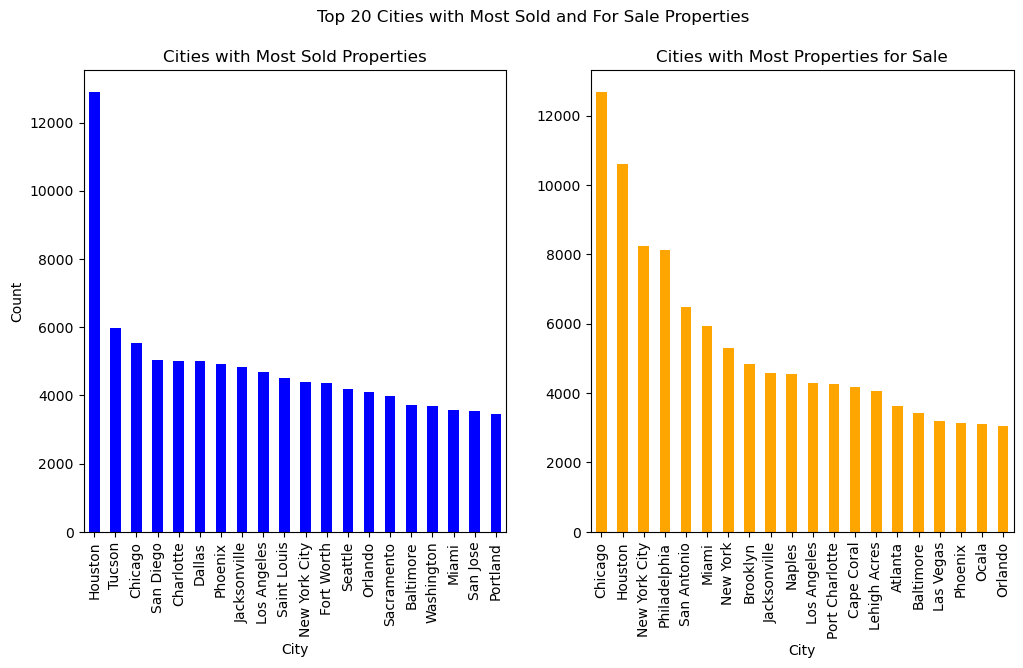

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df_s.plot(x='city', y='status', kind='bar', color='blue', ax=axs[0], legend=False)
axs[0].set_title('Cities with Most Sold Properties')
axs[0].set_xlabel('City')
axs[0].set_ylabel('Count')

df_fs.plot(x='city', y='status', kind='bar', color='orange', ax=axs[1], legend=False)
axs[1].set_title('Cities with Most Properties for Sale')
axs[1].set_xlabel('City')

fig.suptitle('Top 20 Cities with Most Sold and For Sale Properties')

plt.show()

## Distributions

Correlations grouped by sold and for sale, grouped by city and state and one over all (5 total)

In [13]:
sold_correlation = df_sold[['price', 'bed', 'bath', 'acre_lot', 'house_size']].corr()
sold_correlation

,price,bed,bath,acre_lot,house_size
price,1.000000,0.217537,0.378674,0.004242,0.183048
bed,0.217537,1.000000,0.646902,0.000452,0.325102
bath,0.378674,0.646902,1.000000,-0.002083,0.388830
acre_lot,0.004242,0.000452,-0.002083,1.000000,0.000390
house_size,0.183048,0.325102,0.388830,0.000390,1.000000


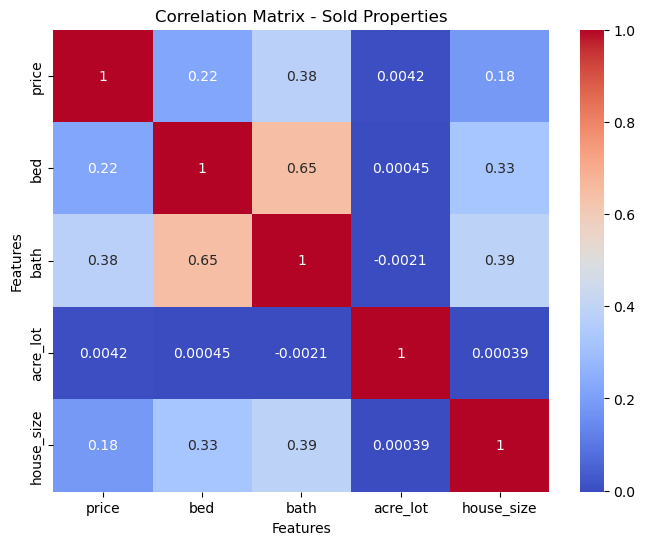

In [14]:

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the correlation matrix on a color scale
sns.heatmap(sold_correlation, annot=True, cmap='coolwarm')

# Set the title and labels
plt.title('Correlation Matrix - Sold Properties')
plt.xlabel('Features')
plt.ylabel('Features')

# Display the plot
plt.show()

In [15]:
for_sale_correlation = df_for_sale[['price', 'bed', 'bath', 'acre_lot', 'house_size']].corr()
for_sale_correlation

,price,bed,bath,acre_lot,house_size
price,1.000000,0.105408,0.158056,0.020289,0.000150
bed,0.105408,1.000000,0.603405,-0.000414,0.166159
bath,0.158056,0.603405,1.000000,-0.000581,0.196385
acre_lot,0.020289,-0.000414,-0.000581,1.000000,0.001275
house_size,0.000150,0.166159,0.196385,0.001275,1.000000


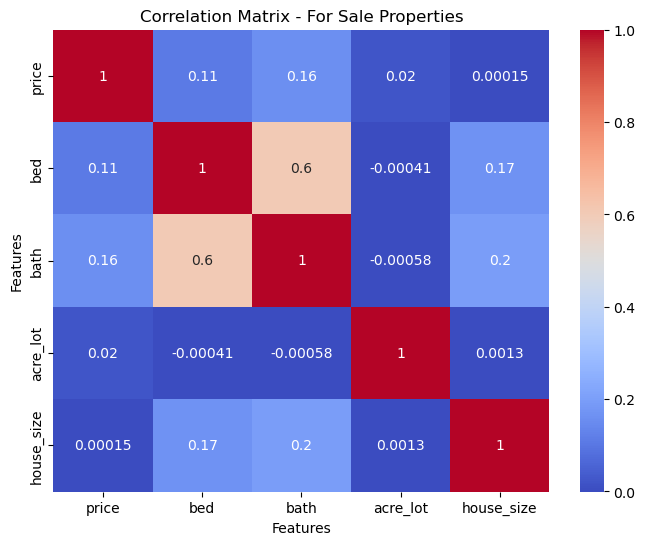

In [16]:

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the correlation matrix on a color scale
sns.heatmap(for_sale_correlation, annot=True, cmap='coolwarm')

# Set the title and labels
plt.title('Correlation Matrix - For Sale Properties')
plt.xlabel('Features')
plt.ylabel('Features')

# Display the plot
plt.show()

In [17]:
df_s

,state,city,status
0,Texas,Houston,12901
1,Arizona,Tucson,5968
2,Illinois,Chicago,5550
3,California,San Diego,5043
4,North Carolina,Charlotte,5022
5,Texas,Dallas,5010
6,Arizona,Phoenix,4908
7,Florida,Jacksonville,4819
8,California,Los Angeles,4695
9,Missouri,Saint Louis,4511


Line graphs for sold and price

In [18]:
# Calculate the average price for each status
df_avg_price = df_sold.groupby('city')['price'].mean().reset_index()

df_sQ = df_sold.groupby(['state', 'city'])['status'].count().reset_index()
merged_df = df_sQ.merge(df_avg_price, on='city')
merged_df


,state,city,status,price
0,Alabama,Adamsville,43,111142.446809
1,Pennsylvania,Adamsville,3,111142.446809
2,Texas,Adamsville,1,111142.446809
3,Alabama,Adger,2,232400.000000
4,Alabama,Akron,6,139535.395995
...,...,...,...,...
17896,Wyoming,Lander,2,167000.000000
17897,Wyoming,Laramie,1,92000.000000
17898,Wyoming,Lusk,6,118000.000000
17899,Wyoming,Shoshoni,1,60000.000000


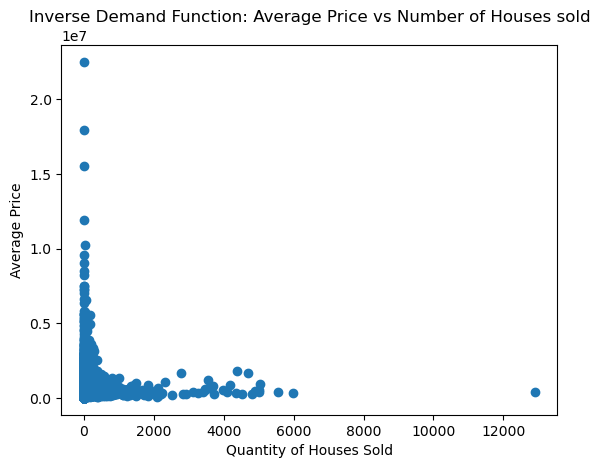

In [19]:
import matplotlib.pyplot as plt

# Plot the scatterplot
plt.scatter(merged_df['status'], merged_df['price'])
plt.xlabel('Quantity of Houses Sold')
plt.ylabel('Average Price')
plt.title('Inverse Demand Function: Average Price vs Number of Houses sold')
plt.show()


log sold log price regression with controls and fixed effects

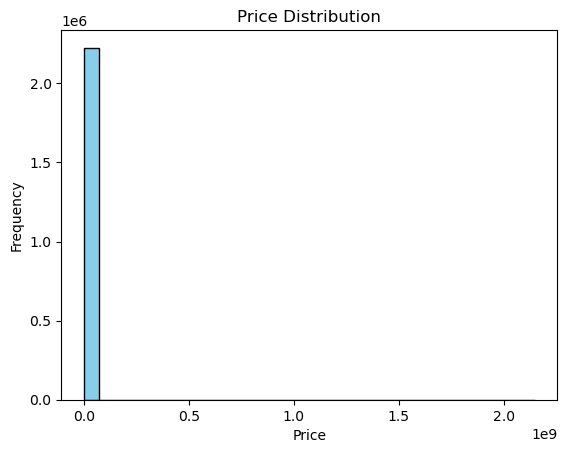

In [20]:
# Histogram with Matplotlib
plt.hist(df_usreal['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Crime

In [21]:
df_crime = pd.read_csv('crime_data_w_population_and_crime_rate.csv')

In [22]:
df_crime

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"St. Louis city, MO",1791.995377,1,1,4,1612,318667,318667,15,15,...,200,1778,3609,4995,13791,3543,464,318416,29,510
1,"Crittenden County, AR",1754.914968,2,1,4,130,50717,50717,4,4,...,38,165,662,1482,1753,189,28,49746,5,35
2,"Alexander County, IL",1664.700485,3,1,4,604,8040,8040,2,2,...,2,5,119,82,184,12,2,7629,17,3
3,"Kenedy County, TX",1456.310680,4,1,4,2681,444,444,1,1,...,3,1,2,5,4,4,0,412,48,261
4,"De Soto Parish, LA",1447.402430,5,1,4,1137,26971,26971,3,3,...,4,17,368,149,494,60,0,27083,22,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,"Ohio County, IN",0.000000,3132,1,4,762,6084,0,2,1,...,0,0,0,2,2,0,0,5994,18,115
3132,"Newton County, MS",0.000000,3133,1,4,1465,21545,3346,3,1,...,0,0,0,4,0,1,0,21689,28,101
3133,"Jerauld County, SD",0.000000,3134,1,4,2424,2108,2108,1,1,...,0,0,0,1,3,1,0,2066,46,73
3134,"Cimarron County, OK",0.000000,3135,1,4,2167,2502,2502,2,2,...,0,0,0,1,2,0,0,2335,40,25


unique_cities = df_usreal['city'].astype(str).tolist()
unique_cities.sort()
unique_cities




In [23]:
unique_combinations = df_usreal[['city', 'state']].astype(str).drop_duplicates().values.tolist()
unique_combinations.sort()
unique_combinations

[['100 89 Lower Shepard Creek Road', 'North Carolina'],
 ['139th Ave Unit Peck', 'Kansas'],
 ['15th Ave Milton', 'Florida'],
 ['177th Ave Wabasha', 'Minnesota'],
 ['178th Ave Wabasha', 'Minnesota'],
 ['1st Saint', 'Texas'],
 ['21 27 Tommie Lane', 'North Carolina'],
 ['24 Jj Rd Rd', 'Kansas'],
 ['240th Saint', 'Iowa'],
 ['260th Saint', 'Iowa'],
 ['3 4 Highview Dr', 'Wisconsin'],
 ['3 Mi Southwest of Benteen', 'Montana'],
 ['30 31 Boardwalk Dr', 'Wisconsin'],
 ['480th Saint', 'Iowa'],
 ['4th Saint', 'Texas'],
 ['647th Saint Wabasha', 'Minnesota'],
 ['667th Saint Wabasha', 'Minnesota'],
 ['68th Ave Princeton Township', 'Minnesota'],
 ['9th Ave Willmar', 'Minnesota'],
 ['Aaronsburg', 'Pennsylvania'],
 ['Abbeville', 'Alabama'],
 ['Abbeville', 'Georgia'],
 ['Abbeville', 'Louisiana'],
 ['Abbeville', 'Mississippi'],
 ['Abbeville', 'South Carolina'],
 ['Abbot', 'Maine'],
 ['Abbotsford', 'Michigan'],
 ['Abbotsford', 'Wisconsin'],
 ['Abbott', 'Texas'],
 ['Abbottstown', 'Pennsylvania'],
 ['Abby Rd

In [24]:

new_unique_combinations = []

for city, state in unique_combinations:
    if state in us_state_id: 
        new_unique_combinations.append(f"{city}, {us_state_id[state]}")
        
new_unique_combinations        

NameError: name 'us_state_id' is not defined

In [ ]:
len(new_unique_combinations)

30489

In [ ]:
df_crime['county_name'].unique()

array(['St. Louis city, MO', 'Crittenden County, AR',
       'Alexander County, IL', ..., 'Jerauld County, SD',
       'Cimarron County, OK', 'Lawrence County, MS'], dtype=object)

In [ ]:
crime_county = df_crime['county_name'].astype(str).unique().tolist()
crime_county.sort()
crime_county

['Abbeville County, SC',
 'Acadia Parish, LA',
 'Accomack County, VA',
 'Ada County, ID',
 'Adair County, IA',
 'Adair County, KY',
 'Adair County, MO',
 'Adair County, OK',
 'Adams County, CO',
 'Adams County, IA',
 'Adams County, ID',
 'Adams County, IL',
 'Adams County, IN',
 'Adams County, MS',
 'Adams County, ND',
 'Adams County, NE',
 'Adams County, OH',
 'Adams County, PA',
 'Adams County, WA',
 'Adams County, WI',
 'Addison County, VT',
 'Aiken County, SC',
 'Aitkin County, MN',
 'Alachua County, FL',
 'Alamance County, NC',
 'Alameda County, CA',
 'Alamosa County, CO',
 'Albany County, NY',
 'Albany County, WY',
 'Albemarle County, VA',
 'Alcona County, MI',
 'Alcorn County, MS',
 'Aleutians East Borough, AK',
 'Aleutians West Census Area, AK',
 'Alexander County, IL',
 'Alexander County, NC',
 'Alexandria city, VA',
 'Alfalfa County, OK',
 'Alger County, MI',
 'Allamakee County, IA',
 'Allegan County, MI',
 'Allegany County, MD',
 'Allegany County, NY',
 'Alleghany County, NC

In [ ]:
common_combinations = [combination for combination in new_unique_combinations if combination in crime_county]
common_combinations


['Alachua County, FL',
 'Autauga County, AL',
 'Blaine County, ID',
 'Boyd County, KY',
 'Butler County, AL',
 'Carson City, NV',
 'Caswell County, NC',
 'Clarke County, AL',
 'Decatur County, TN',
 'Edgefield County, SC',
 'Gadsden County, FL',
 'Harris County, GA',
 'Lackawanna County, PA',
 'Leon County, FL',
 'Lowndes County, AL',
 'Luzerne County, PA',
 'Madison County, FL',
 'Mora County, NM',
 'Patrick County, VA',
 'Pike County, PA',
 'Schuylkill County, PA',
 'Wakulla County, FL',
 'Wayne County, PA',
 'Westchester County, NY',
 'Wichita County, TX',
 'Wilcox County, AL']

In [ ]:
len(common_combinations)

26

In [ ]:
filtered_df_usreal = df_usreal[df_usreal['city_state'].isin(common_combinations)]
filtered_df_usreal

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,city_state
72707,15895.0,for_sale,1679000.0,NaN,NaN,NaN,1804906.0,Westchester County,New York,10803.0,NaN,2018-11-28,"Westchester County, NY"
77996,52993.0,for_sale,329000.0,6.0,5.0,0.32,42550.0,Pike County,Pennsylvania,18324.0,4732.0,NaN,"Pike County, PA"
78192,11474.0,for_sale,224900.0,3.0,2.0,0.28,67718.0,Pike County,Pennsylvania,18324.0,1056.0,NaN,"Pike County, PA"
78213,52993.0,for_sale,499000.0,3.0,2.0,0.44,512282.0,Pike County,Pennsylvania,18324.0,1470.0,2017-12-15,"Pike County, PA"
78400,83859.0,for_sale,439000.0,4.0,5.0,0.51,447699.0,Pike County,Pennsylvania,18337.0,3480.0,2006-09-15,"Pike County, PA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177771,109914.0,sold,549000.0,3.0,2.0,0.23,457981.0,Carson City,Nevada,89706.0,1853.0,2022-04-01,"Carson City, NV"
2177772,34840.0,sold,409900.0,3.0,2.0,0.20,453265.0,Carson City,Nevada,89706.0,1191.0,2022-04-04,"Carson City, NV"
2177775,79193.0,sold,799000.0,3.0,3.0,0.28,787284.0,Carson City,Nevada,89703.0,2713.0,2022-04-04,"Carson City, NV"
2177799,52730.0,sold,424900.0,3.0,2.0,0.13,515809.0,Carson City,Nevada,89706.0,1152.0,2022-04-07,"Carson City, NV"


In [ ]:
merged_filtered_df_usreal = filtered_df_usreal.merge(df_crime, left_on='city_state', right_on='county_name')
merged_filtered_df_usreal


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,15895.0,for_sale,1679000.0,NaN,NaN,NaN,1804906.0,Westchester County,New York,10803.0,...,73,915,1432,1903,10020,634,44,968802,36,119
1,52993.0,for_sale,329000.0,6.0,5.0,0.32,42550.0,Pike County,Pennsylvania,18324.0,...,17,17,36,429,616,30,8,56591,42,103
2,11474.0,for_sale,224900.0,3.0,2.0,0.28,67718.0,Pike County,Pennsylvania,18324.0,...,17,17,36,429,616,30,8,56591,42,103
3,52993.0,for_sale,499000.0,3.0,2.0,0.44,512282.0,Pike County,Pennsylvania,18324.0,...,17,17,36,429,616,30,8,56591,42,103
4,83859.0,for_sale,439000.0,4.0,5.0,0.51,447699.0,Pike County,Pennsylvania,18337.0,...,17,17,36,429,616,30,8,56591,42,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,109914.0,sold,549000.0,3.0,2.0,0.23,457981.0,Carson City,Nevada,89706.0,...,0,14,118,298,731,78,4,54080,32,510
854,34840.0,sold,409900.0,3.0,2.0,0.20,453265.0,Carson City,Nevada,89706.0,...,0,14,118,298,731,78,4,54080,32,510
855,79193.0,sold,799000.0,3.0,3.0,0.28,787284.0,Carson City,Nevada,89703.0,...,0,14,118,298,731,78,4,54080,32,510
856,52730.0,sold,424900.0,3.0,2.0,0.13,515809.0,Carson City,Nevada,89706.0,...,0,14,118,298,731,78,4,54080,32,510


In [ ]:
merged_filtered_df_usreal.to_csv('merged_filtered_df_usreal.csv', index=False)

In [ ]:
merged_filtered_df_usreal['INDEX']


0      2440
1        70
2        70
3        70
4        70
       ... 
853     132
854     132
855     132
856     132
857     132
Name: INDEX, Length: 858, dtype: int64

In [ ]:
merged_filtered_df_usreal['index']

0      1133
1      2097
2      2097
3      2097
4      2097
       ... 
853    1187
854    1187
855    1187
856    1187
857    1187
Name: index, Length: 858, dtype: int64

In [ ]:
merged_filtered_df_usreal.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date',
       'city_state', 'county_name', 'crime_rate_per_100000', 'index',
       'EDITION', 'PART', 'IDNO', 'CPOPARST', 'CPOPCRIM', 'AG_ARRST', 'AG_OFF',
       'COVIND', 'INDEX', 'MODINDX', 'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT',
       'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON', 'population', 'FIPS_ST',
       'FIPS_CTY'],
      dtype='object')

In [ ]:
correlation_matrix = merged_filtered_df_usreal[['price', 'bed', 'bath', 'acre_lot', 'house_size',
                                                'crime_rate_per_100000', 'AG_ARRST', 'AG_OFF',
       'COVIND', 'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT',
       'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON', 'population']].corr().round(2)

correlation_matrix


,price,bed,bath,acre_lot,house_size,crime_rate_per_100000,AG_ARRST,AG_OFF,COVIND,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population
price,1.00,0.19,0.61,0.45,0.31,0.11,-0.06,-0.05,0.02,-0.02,-0.05,-0.06,-0.08,-0.14,-0.12,-0.11,-0.10,-0.11
bed,0.19,1.00,0.42,0.07,0.52,0.25,0.21,0.18,NaN,0.16,0.16,-0.03,-0.03,-0.12,-0.06,-0.21,0.09,-0.02
bath,0.61,0.42,1.00,0.16,0.74,0.18,-0.01,-0.01,NaN,0.04,-0.01,-0.13,-0.16,-0.21,-0.19,-0.25,-0.10,-0.17
acre_lot,0.45,0.07,0.16,1.00,0.10,0.22,0.01,0.00,-0.15,0.05,0.03,-0.03,-0.05,-0.09,-0.08,-0.12,-0.02,-0.11
house_size,0.31,0.52,0.74,0.10,1.00,0.03,0.06,0.06,NaN,0.05,0.05,-0.04,-0.05,-0.08,-0.05,-0.10,0.02,-0.03
crime_rate_per_100000,0.11,0.25,0.18,0.22,0.03,1.00,0.03,-0.05,-0.15,0.23,0.16,0.18,0.27,0.16,0.10,0.15,-0.01,-0.01
AG_ARRST,-0.06,0.21,-0.01,0.01,0.06,0.03,1.00,0.99,-0.00,0.75,0.82,0.47,0.54,0.49,0.64,0.41,0.83,0.70
AG_OFF,-0.05,0.18,-0.01,0.00,0.06,-0.05,0.99,1.00,-0.00,0.72,0.79,0.42,0.49,0.45,0.61,0.38,0.82,0.68
COVIND,0.02,NaN,NaN,-0.15,NaN,-0.15,-0.00,-0.00,1.00,-0.03,-0.00,-0.02,0.03,0.05,0.03,0.06,0.01,0.03
MURDER,-0.02,0.16,0.04,0.05,0.05,0.23,0.75,0.72,-0.03,1.00,0.91,0.79,0.81,0.80,0.88,0.76,0.76,0.81


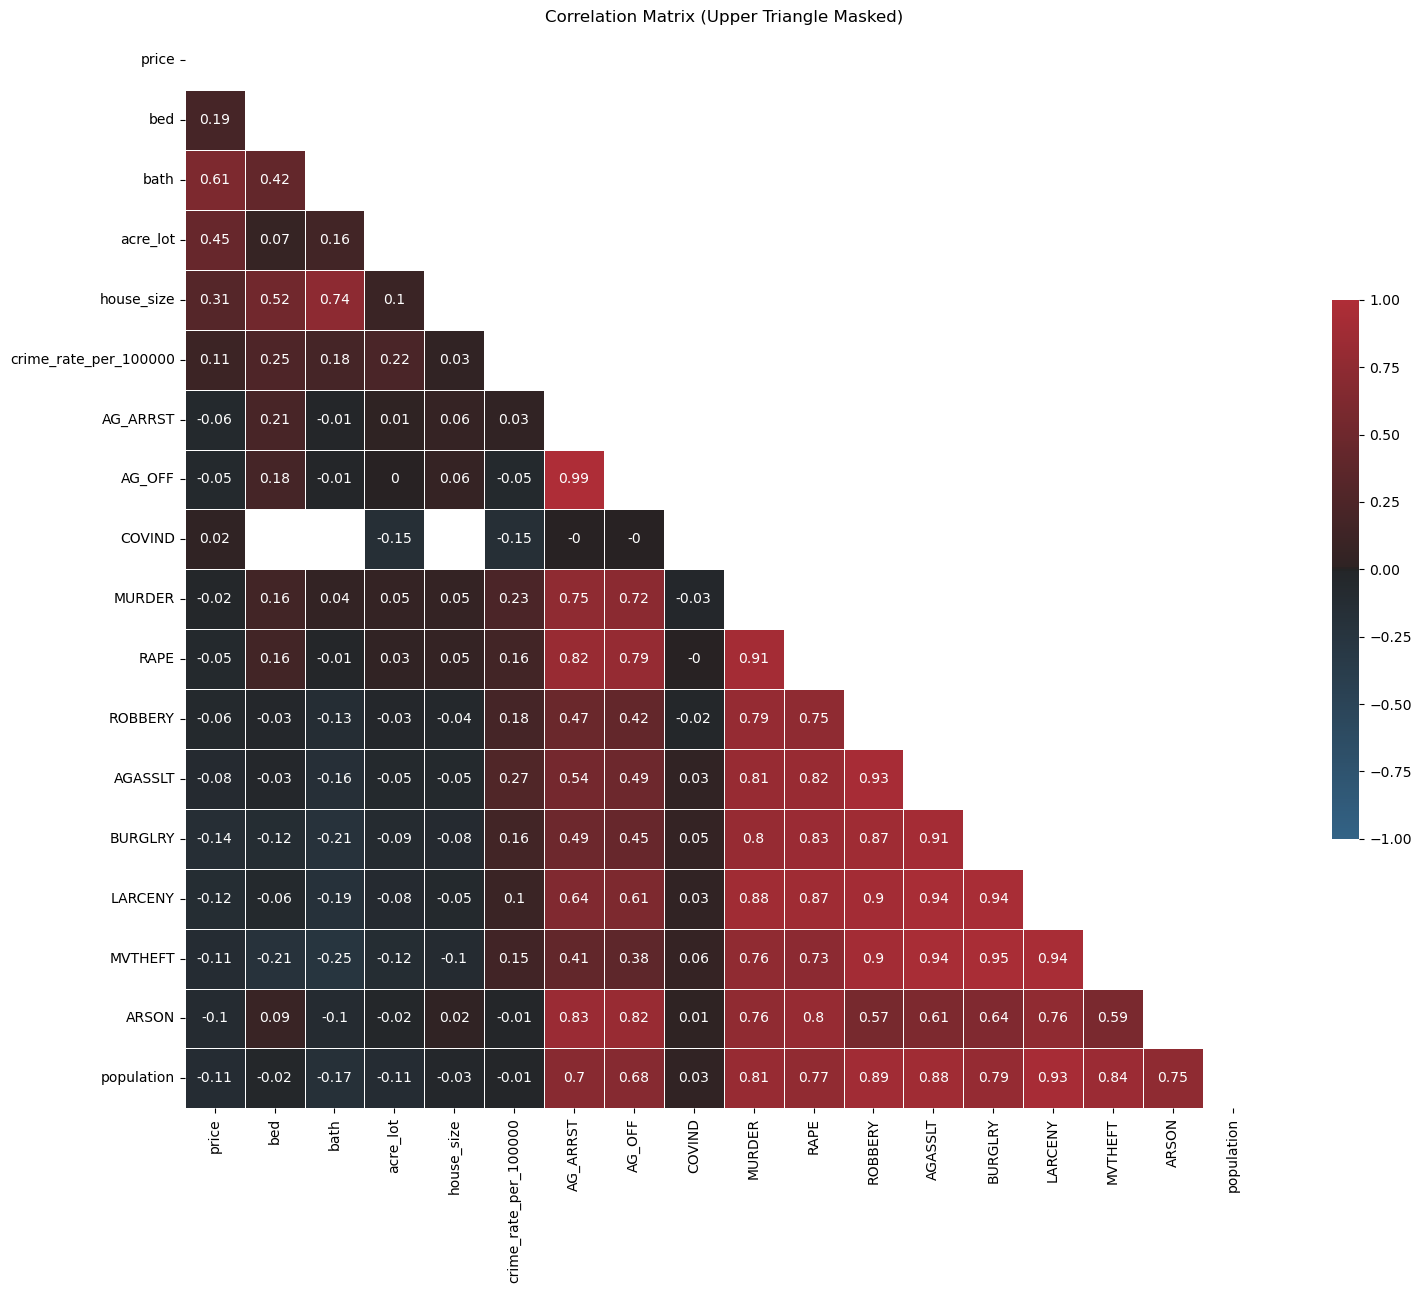

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'correlation_matrix' is your correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(18, 14))

# Generate a custom diverging colormap with more red and blue hues
cmap = sns.diverging_palette(240, 10, as_cmap=True, s=75, l=40, n=9, center="dark")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Title and display the heatmap
plt.title('Correlation Matrix (Upper Triangle Masked)')
plt.show()


Coverage Indicator Calculation

Coverage Indicator is calculated as follows:
CI_x = 100 * ( 1 - SUM_i { [ORIPOP_i/COUNTYPOP] * [ (12 - MONTHSREPORTED_i)/12 ] } )
         where CI = Coverage Indicator
                x = county
                i = ORI within county

RANDOM FOREST

In [ ]:
# Check for missing values in the specified columns
#columns_of_interest = ['bed', 'bath', 'acre_lot', 'house_size', 'crime_rate_per_100000', 'AG_ARRST', 'AG_OFF','COVIND', 'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON', 'population']

#missing_data = merged_filtered_df_usreal[columns_of_interest].isna().sum()
#missing_data_percentage = merged_filtered_df_usreal[columns_of_interest].isna().mean() * 100


We have significant missing values in several key features such as 'bed', 'bath', 'acre_lot', and 'house_size'. Here are the percentages of missing data for these columns:

'bed': 22.84%
'bath': 29.02%
'acre_lot': 8.04%
'house_size': 22.38%
Given that the percentages are relatively high for 'bed' and 'bath', imputing these missing values might be more appropriate than dropping them, to avoid losing too much data. For 'acre_lot' and 'house_size', we might choose similar imputation methods or consider dropping, based on your preference. Impute with Median/Mode: Useful for 'bed', 'bath', 'acre_lot', 'house_size' since they are numerical and we can preserve more data.

## set up

In [25]:

from hmac import new


us_state_id = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Puerto Rico': 'PR',
    'Virgin Islands': 'VI',
    'District of Columbia': 'DC',
    'Guam': 'GU',
    'New Brunswick': 'NB',
    
}


In [26]:
df_usreal['city_state'] = df_usreal['city'] + ', ' + df_usreal['state'].map(us_state_id)

In [27]:
df_usreal.dropna(subset=['city_state'], inplace=True)

In [28]:
df_usreal.shape

(2224967, 13)

In [29]:
df_sold = df_usreal[df_usreal['status'] == 'sold']
df_for_sale = df_usreal[df_usreal['status'] == 'for_sale']
df_ready = df_usreal[df_usreal['status'] == 'ready_to_build']

In [30]:
df_sold.to_csv('cleaned_sold.csv', index=False)
df_for_sale.to_csv('cleaned_for_sale.csv', index=False)
df_ready.to_csv('cleaned_ready.csv', index=False)

## Random Forest

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

In [32]:
df_sold

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,city_state
1414373,62066.0,sold,77500.0,3.0,1.0,NaN,1072625.0,Ponce,Puerto Rico,717.0,957.0,2021-11-29,"Ponce, PR"
1414374,72457.0,sold,524900.0,3.0,2.0,0.09,1850809.0,Aguada,Puerto Rico,602.0,2200.0,2021-12-13,"Aguada, PR"
1414375,48586.0,sold,175000.0,NaN,NaN,0.14,1139965.0,Aguadilla,Puerto Rico,603.0,3200.0,2021-11-29,"Aguadilla, PR"
1414376,61711.0,sold,90000.0,3.0,2.0,0.08,141421.0,Aguadilla,Puerto Rico,603.0,1421.0,2021-10-19,"Aguadilla, PR"
1414377,49592.0,sold,22500.0,2.0,1.0,0.32,1889894.0,Anasco,Puerto Rico,610.0,850.0,2021-12-30,"Anasco, PR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25,"Richland, WA"
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25,"Richland, WA"
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24,"Richland, WA"
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24,"Richland, WA"


In [33]:
#df_sold_1 = df_sold.sample(frac=0.01, random_state=42)

In [34]:
#df_sold_1.to_csv('cleaned_sold_1.csv', index=False)

### RF Sold

In [35]:
df_sold_copy = df_sold.copy()

In [36]:
# Assuming df_sold_copy is your DataFrame

# Numeric and categorical columns
columns_of_interest = ['bed', 'bath', 'acre_lot', 'house_size']  # Numeric data
categorical_columns = ['street', 'state', 'zip_code', 'city_state']  # Categorical data

In [37]:

# Impute missing values with the median for the respective columns within the subgroup of 'city_state'
for col in columns_of_interest + ['price']:
    df_sold_copy[col] = df_sold_copy.groupby('city_state')[col].transform(lambda x: x.fillna(x.median()))

In [38]:
df_sold_copy.dropna(subset=columns_of_interest + ['price'], inplace=True)


In [39]:
df_sold_copy

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,city_state
1414373,62066.0,sold,77500.0,3.0,1.0,0.86,1072625.0,Ponce,Puerto Rico,717.0,957.0,2021-11-29,"Ponce, PR"
1414374,72457.0,sold,524900.0,3.0,2.0,0.09,1850809.0,Aguada,Puerto Rico,602.0,2200.0,2021-12-13,"Aguada, PR"
1414375,48586.0,sold,175000.0,3.0,2.0,0.14,1139965.0,Aguadilla,Puerto Rico,603.0,3200.0,2021-11-29,"Aguadilla, PR"
1414376,61711.0,sold,90000.0,3.0,2.0,0.08,141421.0,Aguadilla,Puerto Rico,603.0,1421.0,2021-10-19,"Aguadilla, PR"
1414377,49592.0,sold,22500.0,2.0,1.0,0.32,1889894.0,Anasco,Puerto Rico,610.0,850.0,2021-12-30,"Anasco, PR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25,"Richland, WA"
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25,"Richland, WA"
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24,"Richland, WA"
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24,"Richland, WA"


In [40]:
# Select features and target variable
X1 = df_sold_copy[columns_of_interest]  # Features
y1 = df_sold_copy['price']              # Target variable

# Split the data into train and test sets (80% train, 20% test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model1.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred1 = rf_model1.predict(X_test1)

# Evaluate the model
mae1 = mean_absolute_error(y_test1, y_pred1)
mse1 = mean_squared_error(y_test1, y_pred1)
rmse1 = mse1 ** 0.5
r21 = r2_score(y_test1, y_pred1)

#mae1, mse1, rmse1, r21
print(f"Mean Absolute Error: {mae1}")
print(f"Mean Squared Error: {mse1}")
print(f"Root Mean Squared Error: {rmse1}")
print(f"R^2 Score: {r21}")

Mean Absolute Error: 280981.32388432795
Mean Squared Error: 589956028141.2501
Root Mean Squared Error: 768085.9510115064
R^2 Score: 0.001390086564305948


In [41]:
# Create a dictionary with the metrics
metrics_sold = {'MAE': [mae1], 'MSE': [mse1], 'RMSE': [rmse1], 'R2': [r21]}

# Create a DataFrame from the dictionary
df_metrics = pd.DataFrame(metrics_sold, index=['RF sold properties'])

# Display the data table
df_metrics


,MAE,MSE,RMSE,R2
RF sold properties,280981.323884,5.899560e+11,768085.951012,0.00139


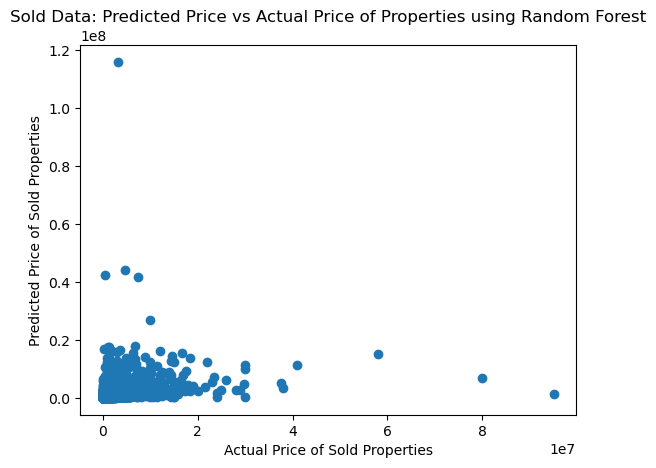

In [42]:
import matplotlib.pyplot as plt

# Plot the predicted values vs actual values
plt.scatter(y_test1, y_pred1)
plt.xlabel('Actual Price of Sold Properties')
plt.ylabel('Predicted Price of Sold Properties')
plt.title('Sold Data: Predicted Price vs Actual Price of Properties using Random Forest')
plt.show()


### RF For Sale


In [43]:
df_for_sale_copy = df_for_sale.copy()

In [44]:
# Impute missing values with the median for the respective columns within the subgroup of 'city_state'
for col in columns_of_interest + ['price']:
    df_for_sale_copy[col] = df_for_sale_copy.groupby('city_state')[col].transform(lambda x: x.fillna(x.median()))


In [45]:
df_for_sale_copy.dropna(subset=columns_of_interest + ['price'], inplace=True)

In [46]:
# Select features and target variable
X2 = df_for_sale_copy[columns_of_interest]  # Features
y2 = df_for_sale_copy['price']              # Target variable

# Split the data into train and test sets (80% train, 20% test)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model2.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred2 = rf_model2.predict(X_test2)

# Evaluate the model
mae2 = mean_absolute_error(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = mse2 ** 0.5
r22 = r2_score(y_test2, y_pred2)

#print(mae2, mse2, rmse2, r22)
print(f"Mean Absolute Error: {mae2}")
print(f"Mean Squared Error: {mse2}")
print(f"Root Mean Squared Error: {rmse2}")
print(f"R^2 Score: {r22}")

Mean Absolute Error: 369363.94685735955
Mean Squared Error: 9681853884756.152
Root Mean Squared Error: 3111567.753521712
R^2 Score: 0.0015977076708856286


In [47]:
# Create a dictionary with the metrics for 'for sale properties'
metrics_for_sale = {'MAE': [mae2], 'MSE': [mse2], 'RMSE': [rmse2], 'R2': [r22]}

# Create a DataFrame from the dictionary
df_metrics_for_sale = pd.DataFrame(metrics_for_sale, index=['RF for sale properties'])

# Concatenate the two DataFrames
df_metrics = pd.concat([df_metrics, df_metrics_for_sale])

# Display the updated data table
df_metrics

,MAE,MSE,RMSE,R2
RF sold properties,280981.323884,5.899560e+11,7.680860e+05,0.001390
RF for sale properties,369363.946857,9.681854e+12,3.111568e+06,0.001598


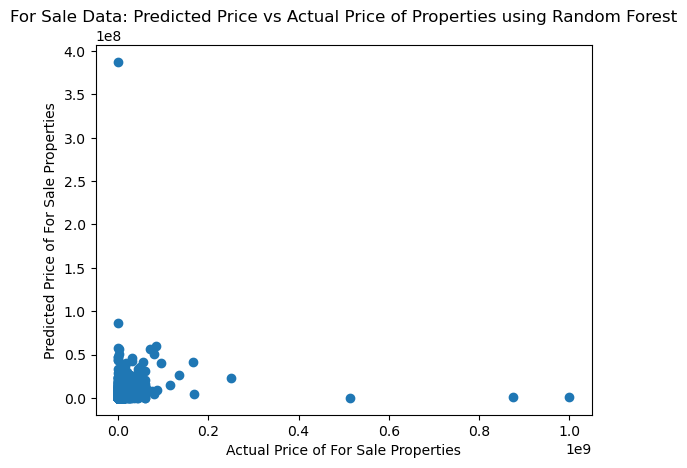

In [48]:
# Plot the predicted values vs actual values
plt.scatter(y_test2, y_pred2)
plt.xlabel('Actual Price of For Sale Properties')
plt.ylabel('Predicted Price of For Sale Properties')
plt.title('For Sale Data: Predicted Price vs Actual Price of Properties using Random Forest')
plt.show()


### RF Ready to Build

In [49]:
df_ready_copy = df_ready.copy()

In [50]:
df_ready_copy.drop('bath', axis=1, inplace=True)
df_ready_copy.drop('acre_lot', axis=1, inplace=True)


In [51]:
new_columns_of_interest = ['bed', 'house_size']

In [52]:
# Impute missing values with the median for the respective columns within the subgroup of 'city_state'
for col in new_columns_of_interest + ['price']:
    df_ready_copy[col] = df_ready_copy.groupby('city_state')[col].transform(lambda x: x.fillna(x.median()))

In [53]:
df_ready_copy.dropna(subset=['price'], inplace=True)
df_ready_copy.dropna(subset=['house_size'], inplace=True)

In [54]:
# Select features and target variable
X3 = df_ready_copy[new_columns_of_interest]  # Features
y3 = df_ready_copy['price']              # Target variable

# Split the data into train and test sets (80% train, 20% test)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model3 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model3.fit(X_train3, y_train3)

# Make predictions on the test set
y_pred3 = rf_model3.predict(X_test3)

# Evaluate the model
mae3 = mean_absolute_error(y_test3, y_pred3)
mse3 = mean_squared_error(y_test3, y_pred3)
rmse3 = mse3 ** 0.5
r23 = r2_score(y_test3, y_pred3)

#print(mae, mse, rmse, r2)
print(f"Mean Absolute Error: {mae3}")
print(f"Mean Squared Error: {mse3}")
print(f"Root Mean Squared Error: {rmse3}")
print(f"R^2 Score: {r23}")

Mean Absolute Error: 115061.91496507649
Mean Squared Error: 43153188786.98864
Root Mean Squared Error: 207733.45610899714
R^2 Score: 0.31387235845727735


In [55]:
# Create a dictionary with the metrics for 'for sale properties'
metrics_ready = {'MAE': [mae3], 'MSE': [mse3], 'RMSE': [rmse3], 'R2': [r23]}

# Create a DataFrame from the dictionary
df_metrics_ready = pd.DataFrame(metrics_ready, index=['RF ready to build properties'])

# Concatenate the two DataFrames
df_metrics = pd.concat([df_metrics, df_metrics_ready])

# Display the updated data table
df_metrics

,MAE,MSE,RMSE,R2
RF sold properties,280981.323884,5.899560e+11,7.680860e+05,0.001390
RF for sale properties,369363.946857,9.681854e+12,3.111568e+06,0.001598
RF ready to build properties,115061.914965,4.315319e+10,2.077335e+05,0.313872


In [56]:
df_metrics.to_csv('Random forest data.csv', index=False)

In [89]:
df_metrics.to_excel('Random forest data.xlsx', index=False)

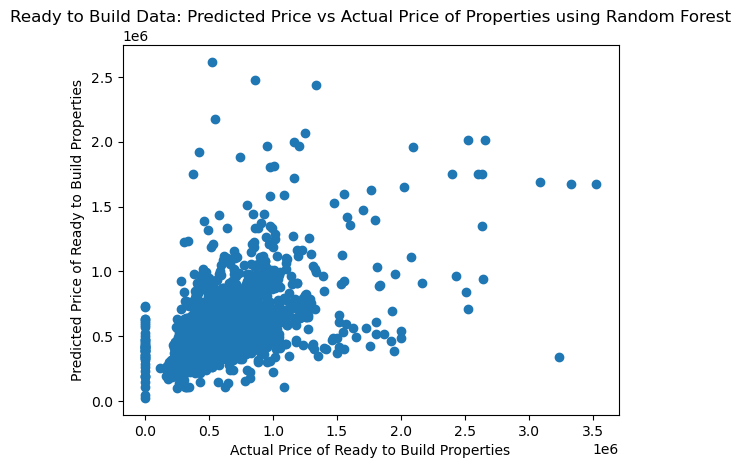

In [57]:
# Plot the predicted values vs actual values
plt.scatter(y_test3, y_pred3)
plt.xlabel('Actual Price of Ready to Build Properties')
plt.ylabel('Predicted Price of Ready to Build Properties')
plt.title('Ready to Build Data: Predicted Price vs Actual Price of Properties using Random Forest')
plt.show()

### OLS Sold

In [58]:
columns_of_interest

['bed', 'bath', 'acre_lot', 'house_size']

In [59]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming these are the columns of interest:
columns_of_interest = ['bed', 'bath', 'acre_lot', 'house_size']  # Modify this list based on your specific variables of interest


# Create dummy variables for 'city_state'
dummies4 = pd.get_dummies(df_sold_copy['state'], drop_first=True)
X4 = pd.concat([df_sold_copy[columns_of_interest], dummies4], axis=1)

# Dependent variable
y4 = df_sold_copy['price']

# Instantiate and fit the Linear Regression model
model4 = LinearRegression()
model4.fit(X4, y4)

# Predict using the model (optional, depending on your needs)
# predictions = model.predict(X)

# Print the coefficients and intercept
print("Coefficients:", model4.coef_)
print("Intercept:", model4.intercept_)

# Calculate the Mean Squared Error (MSE) as one of the performance metrics
mse4 = mean_squared_error(y4, model4.predict(X4))
# Calculate mean absolute error (MAE)
mae4 = mean_absolute_error(y4, model4.predict(X4))

# Calculate root mean squared error (RMSE)
rmse4 = mse4 ** 0.5

# Calculate R^2 score
r24 = r2_score(y4, model4.predict(X4))

# Print the metrics
print("Mean Absolute Error:", mae4)
print("Root Mean Squared Error:", rmse4)
print("R^2 Score:", r24)
print("Mean Squared Error:", mse4)


Coefficients: [-1.89551122e+04  2.56865240e+05  8.91370607e-02  3.05614009e+01
  2.04233117e+05  4.74819293e+04  6.81294253e+05  2.33055408e+05
  1.40934364e+05  5.90946821e+04  5.76182782e+05  1.64495790e+05
  5.41549243e+03  1.30461042e+06  2.25934351e+05  6.36684096e+04
  7.31537533e+04  1.09177731e+04 -1.47327626e+04  1.40134444e+04
  5.50956120e+03  6.56232333e+04  3.92230914e+05  4.77633905e+04
  1.00809915e+05 -2.99978568e+04  1.72269933e+04  3.10581837e+05
  5.69663859e+04  3.33424380e+05  1.82336383e+05  1.75104915e+05
  7.57739201e+04  3.73797834e+05  3.41263359e+04 -4.83174657e+04
  1.43572075e+03  1.85981886e+04  2.85283105e+05  5.19972265e+04
  1.45001512e+05  2.07680164e+05  2.65512591e+04 -4.39953196e+03
  4.38328060e+04  6.06579108e+04  1.06149537e+06  1.88025992e+05
  1.15038035e+05  9.61470680e+04  3.87193378e+05 -2.89468442e+04
  4.81087152e+04 -3.23645568e+04]
Intercept: -340934.63553270884
Mean Absolute Error: 246402.82507758384
Root Mean Squared Error: 693750.3399

In [60]:
ols_sold = {'MAE': [mae4], 'MSE': [mse4], 'RMSE': [rmse4], 'R2': [r24]}
df_ols = pd.DataFrame(ols_sold, index=['OLS sold properties'])
df_ols

,MAE,MSE,RMSE,R2
OLS sold properties,246402.825078,4.812895e+11,693750.339921,0.227945


### OLS For Sale

In [61]:
# Assuming these are the columns of interest:
columns_of_interest = ['bed', 'bath', 'acre_lot', 'house_size']  # Modify this list based on your specific variables of interest

# Create dummy variables for 'city_state'
dummies5 = pd.get_dummies(df_for_sale_copy['state'], drop_first=True)
X5 = pd.concat([df_for_sale_copy[columns_of_interest], dummies5], axis=1)

# Dependent variable
y5 = df_for_sale_copy['price']

# Instantiate and fit the Linear Regression model
model5 = LinearRegression()
model5.fit(X5, y5)

# Print the coefficients and intercept
print("Coefficients:", model5.coef_)
print("Intercept:", model5.intercept_)

# Calculate the Mean Squared Error (MSE) as one of the performance metrics
mse5 = mean_squared_error(y5, model5.predict(X5))
# Calculate mean absolute error (MAE)
mae5 = mean_absolute_error(y5, model5.predict(X5))
# Calculate root mean squared error (RMSE)
rmse5 = mse5 ** 0.5
# Calculate R^2 score
r25 = r2_score(y5, model5.predict(X5))

# Print the metrics
print("Mean Absolute Error:", mae5)
print("Root Mean Squared Error:", rmse5)
print("R^2 Score:", r25)
print("Mean Squared Error:", mse5)


Coefficients: [ 3.73919634e+04  2.15017266e+05  6.19312170e+01 -2.47166987e-04
 -1.41622715e+04  2.37607270e+05  1.34583536e+04  7.81063899e+05
  5.06809825e+05  3.07391472e+05  1.44295422e+05  6.75467442e+05
  3.49095585e+05  2.18378775e+04  3.91044069e+05  9.84710953e+05
  3.85593218e+05  7.68045660e+04  1.92135515e+04 -1.14054168e+04
  8.99916307e+04  1.33514356e+04  1.98814988e+04  8.53063430e+04
  9.57837356e+04  6.14312054e+05  2.27381365e+04  9.33955772e+04
 -3.13087837e+04  8.38506903e+03  5.85320416e+05 -3.41377674e+04
  3.67133319e+05  1.95571914e+05  2.69280741e+05  5.06726421e+04
  8.27872834e+05  1.02905168e+04 -4.45228101e+04  4.71384478e+03
  3.37867138e+04  2.97479828e+05  7.18157908e+04  3.63277953e+05
  2.75431511e+05  6.14080778e+04  9.76181274e+04  9.08727080e+04
  1.45864620e+05  4.24968415e+05  1.12803448e+05  3.16788508e+05
  8.82952573e+04  4.09259693e+05 -3.41319343e+04  2.91889544e+04
  3.00028976e+05]
Intercept: -346179.3675390403
Mean Absolute Error: 393078.

In [62]:
ols_for_sale = {'MAE': [mae5], 'MSE': [mse5], 'RMSE': [rmse5], 'R2': [r25]}
df_ols_for_sale = pd.DataFrame(ols_for_sale, index=['OLS for sale properties'])
df_ols = pd.concat([df_ols, df_ols_for_sale])
df_ols

,MAE,MSE,RMSE,R2
OLS sold properties,246402.825078,4.812895e+11,6.937503e+05,0.227945
OLS for sale properties,393078.518205,6.784454e+12,2.604698e+06,0.032669


### OLS Ready to Build

In [63]:
# Create dummy variables for 'city_state'
dummies6 = pd.get_dummies(df_ready_copy['state'], drop_first=True)
X6 = pd.concat([df_ready_copy[new_columns_of_interest], dummies6], axis=1)

# Dependent variable
y6 = df_ready_copy['price']

# Instantiate and fit the Linear Regression model
model6 = LinearRegression()
model6.fit(X6, y6)

# Print the coefficients and intercept
print("Coefficients:", model6.coef_)
print("Intercept:", model6.intercept_)

# Calculate the Mean Squared Error (MSE) as one of the performance metrics
mse6 = mean_squared_error(y6, model6.predict(X6))
# Calculate mean absolute error (MAE)
mae6 = mean_absolute_error(y6, model6.predict(X6))
# Calculate root mean squared error (RMSE)
rmse6 = mse6 ** 0.5
# Calculate R^2 score
r26 = r2_score(y6, model6.predict(X6))

# Print the metrics
print("Mean Absolute Error:", mae6)
print("Root Mean Squared Error:", rmse6)
print("R^2 Score:", r26)
print("Mean Squared Error:", mse6)


Coefficients: [-5.22441977e+04  2.25324221e+02  2.53738689e+05  1.03198221e+05
  5.76047701e+05  3.03229255e+05  4.43296856e+05  2.01280232e+05
  1.53285646e+05  8.80292506e+04  1.14208387e+05  6.59535625e+04
  2.76543947e+04  8.85568406e+04  2.29237407e+04  2.56522009e+05
  5.39546786e+05  1.23156652e+05  1.77029223e+05  1.19419264e+05
  2.57646738e+05  3.93475675e+05  9.29386130e+04  7.22112873e+05
  1.08066640e+05  8.68540610e+04  1.01757464e+05  2.98579248e+05
  1.03637229e+05  8.91329537e+04  1.56790731e+05  1.02091993e+05
  2.63482468e+05  1.41791008e+05  5.03703948e+05  9.78549543e+04
  1.78200419e+05]
Intercept: -462.7365601477213
Mean Absolute Error: 105471.59648787207
Root Mean Squared Error: 177018.31437806194
R^2 Score: 0.51520612107609
Mean Squared Error: 31335483625.250374


In [64]:
ols_ready = {'MAE': [mae6], 'MSE': [mse6], 'RMSE': [rmse6], 'R2': [r26]}
df_ols_ready = pd.DataFrame(ols_ready, index=['OLS ready to build properties'])
df_ols = pd.concat([df_ols, df_ols_ready])
df_ols

,MAE,MSE,RMSE,R2
OLS sold properties,246402.825078,4.812895e+11,6.937503e+05,0.227945
OLS for sale properties,393078.518205,6.784454e+12,2.604698e+06,0.032669
OLS ready to build properties,105471.596488,3.133548e+10,1.770183e+05,0.515206


In [65]:
df_ols.to_csv('OLS data.csv', index=False)

In [88]:
df_ols.to_excel('OLS data.xlsx', index=False)


### graphs

In [66]:
y4_pred = model4.predict(X4)
y5_pred = model5.predict(X5)
y6_pred = model6.predict(X6)

In [68]:
# Create dummy variables for the categorical data
#df_encoded = pd.get_dummies(df_sold_copy[categorical_columns], drop_first=True)

In [69]:
#try:
    #X = df_sold_copy[columns_of_interest]
    #y = df_sold_copy['price']
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #rf_model = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42)
    #rf_model.fit(X_train, y_train)
    #print("Model trained successfully")
#except Exception as e:
    #print("Error in processing or training:", e)

In [ ]:
#try:
    #X = pd.concat([df_sold_copy[columns_of_interest], df_encoded], axis=1)
    #y = df_sold_copy['price']
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #rf_model1 = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42)
    #rf_model1.fit(X_train, y_train)
    #print("Model trained successfully")
#except Exception as e:
   # print("Error in processing or training:", e)

In [ ]:

# Combine numeric and encoded categorical data
#X = pd.concat([df_sold_copy[columns_of_interest], df_encoded], axis=1)

# Target variable
#y = df_sold_copy['price']

# Split the data into train and test sets (80% train, 20% test)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
#rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
#rf_model.fit(X_train, y_train)


In [ ]:
# Make predictions on the test set
#y_pred = rf_model.predict(X_test)

# Evaluate the model
#mae = mean_absolute_error(y_test, y_pred)
#mse = mean_squared_error(y_test, y_pred)
#rmse = mse ** 0.5
#r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
#print(f"Mean Absolute Error: {mae}")
#print(f"Mean Squared Error: {mse}")
#print(f"Root Mean Squared Error: {rmse}")
#print(f"R^2 Score: {r2}")


## histograms

In [70]:
df_sold_copy.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,797990.000000,8.009950e+05,800995.000000,800995.000000,800995.000000,7.987780e+05,800983.000000,800995.000000
mean,52953.943661,4.860992e+05,3.177719,2.371703,10.634320,9.451711e+05,54896.134714,1891.184972
std,30656.721637,7.895495e+05,1.258694,1.115272,724.548761,5.426645e+05,30834.296293,2139.584913
min,0.000000,1.000000e+00,1.000000,1.000000,0.000000,5.000000e+00,602.000000,100.000000
25%,23549.000000,2.050000e+05,3.000000,2.000000,0.140000,4.743395e+05,28721.000000,1298.000000
50%,52946.000000,3.450000e+05,3.000000,2.000000,0.200000,9.440600e+05,55124.000000,1670.000000
75%,79174.000000,5.510000e+05,4.000000,3.000000,0.390000,1.413066e+06,85367.000000,2209.000000
max,110138.000000,2.950000e+08,444.000000,222.000000,100000.000000,2.001348e+06,99403.000000,927828.000000


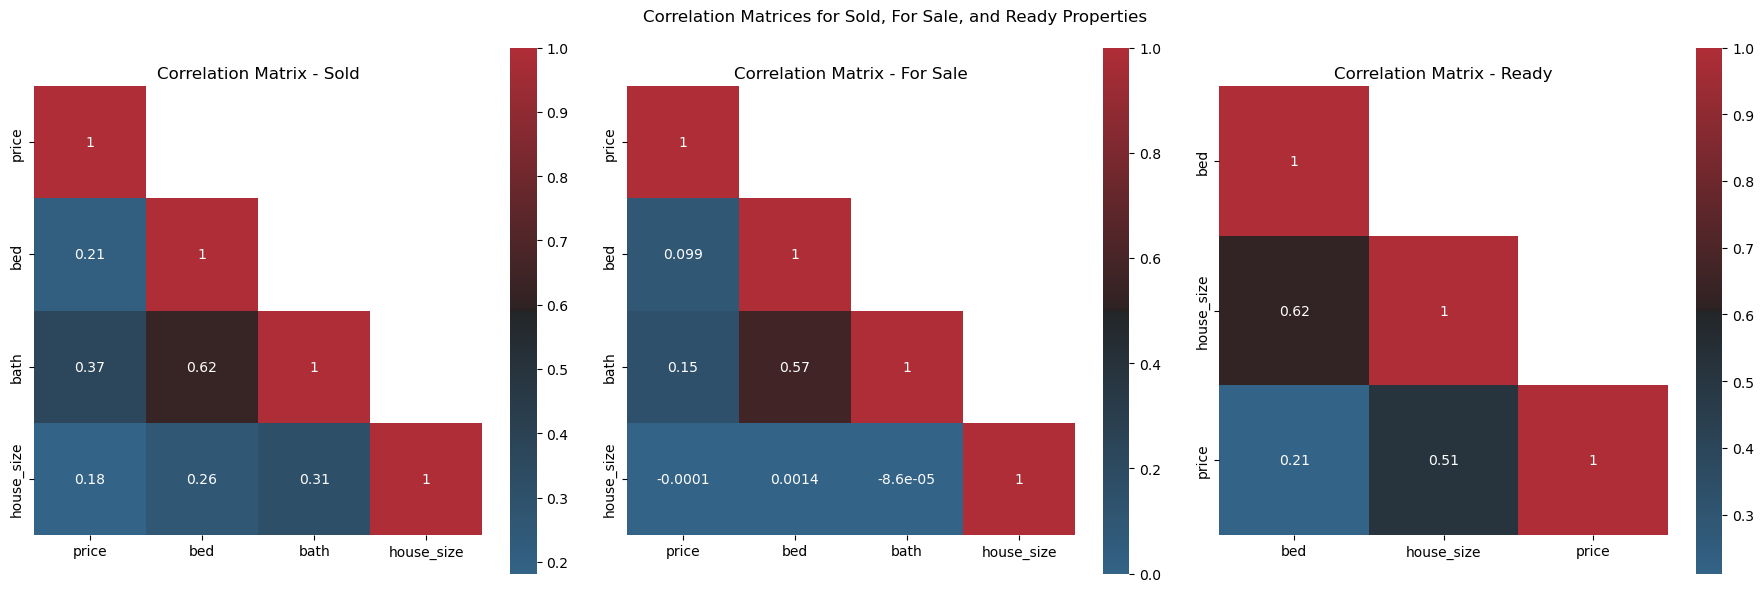

In [125]:
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Select the columns of interest
columns_of_interest = ['price', 'bed', 'bath', 'house_size']

# Create correlation matrices
corr_matrix_sold = df_sold_copy[columns_of_interest].corr()
corr_matrix_for_sale = df_for_sale_copy[columns_of_interest].corr()
corr_matrix_ready = df_ready_copy[new_columns_of_interest + ['price']].corr()

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot correlation matrix for df_sold_copy
cmap = sns.diverging_palette(240, 10, as_cmap=True, s=75, l=40, n=9, center="dark")
mask = np.triu(np.ones_like(corr_matrix_sold, dtype=bool), k=1)
sns.heatmap(corr_matrix_sold, mask=mask, annot=True, cmap=cmap, square=True, ax=axs[0])
axs[0].set_title('Correlation Matrix - Sold')

# Plot correlation matrix for df_for_sale_copy
mask = np.triu(np.ones_like(corr_matrix_for_sale, dtype=bool), k=1)
sns.heatmap(corr_matrix_for_sale, mask=mask, annot=True, cmap=cmap, square=True, ax=axs[1])
axs[1].set_title('Correlation Matrix - For Sale')

# Plot correlation matrix for df_ready_copy
mask = np.triu(np.ones_like(corr_matrix_ready, dtype=bool), k=1)
sns.heatmap(corr_matrix_ready, mask=mask, annot=True, cmap=cmap, square=True, ax=axs[2])
axs[2].set_title('Correlation Matrix - Ready')

# Customize the plot

plt.suptitle('Correlation Matrices for Sold, For Sale, and Ready Properties')
plt.tight_layout()
plt.show()

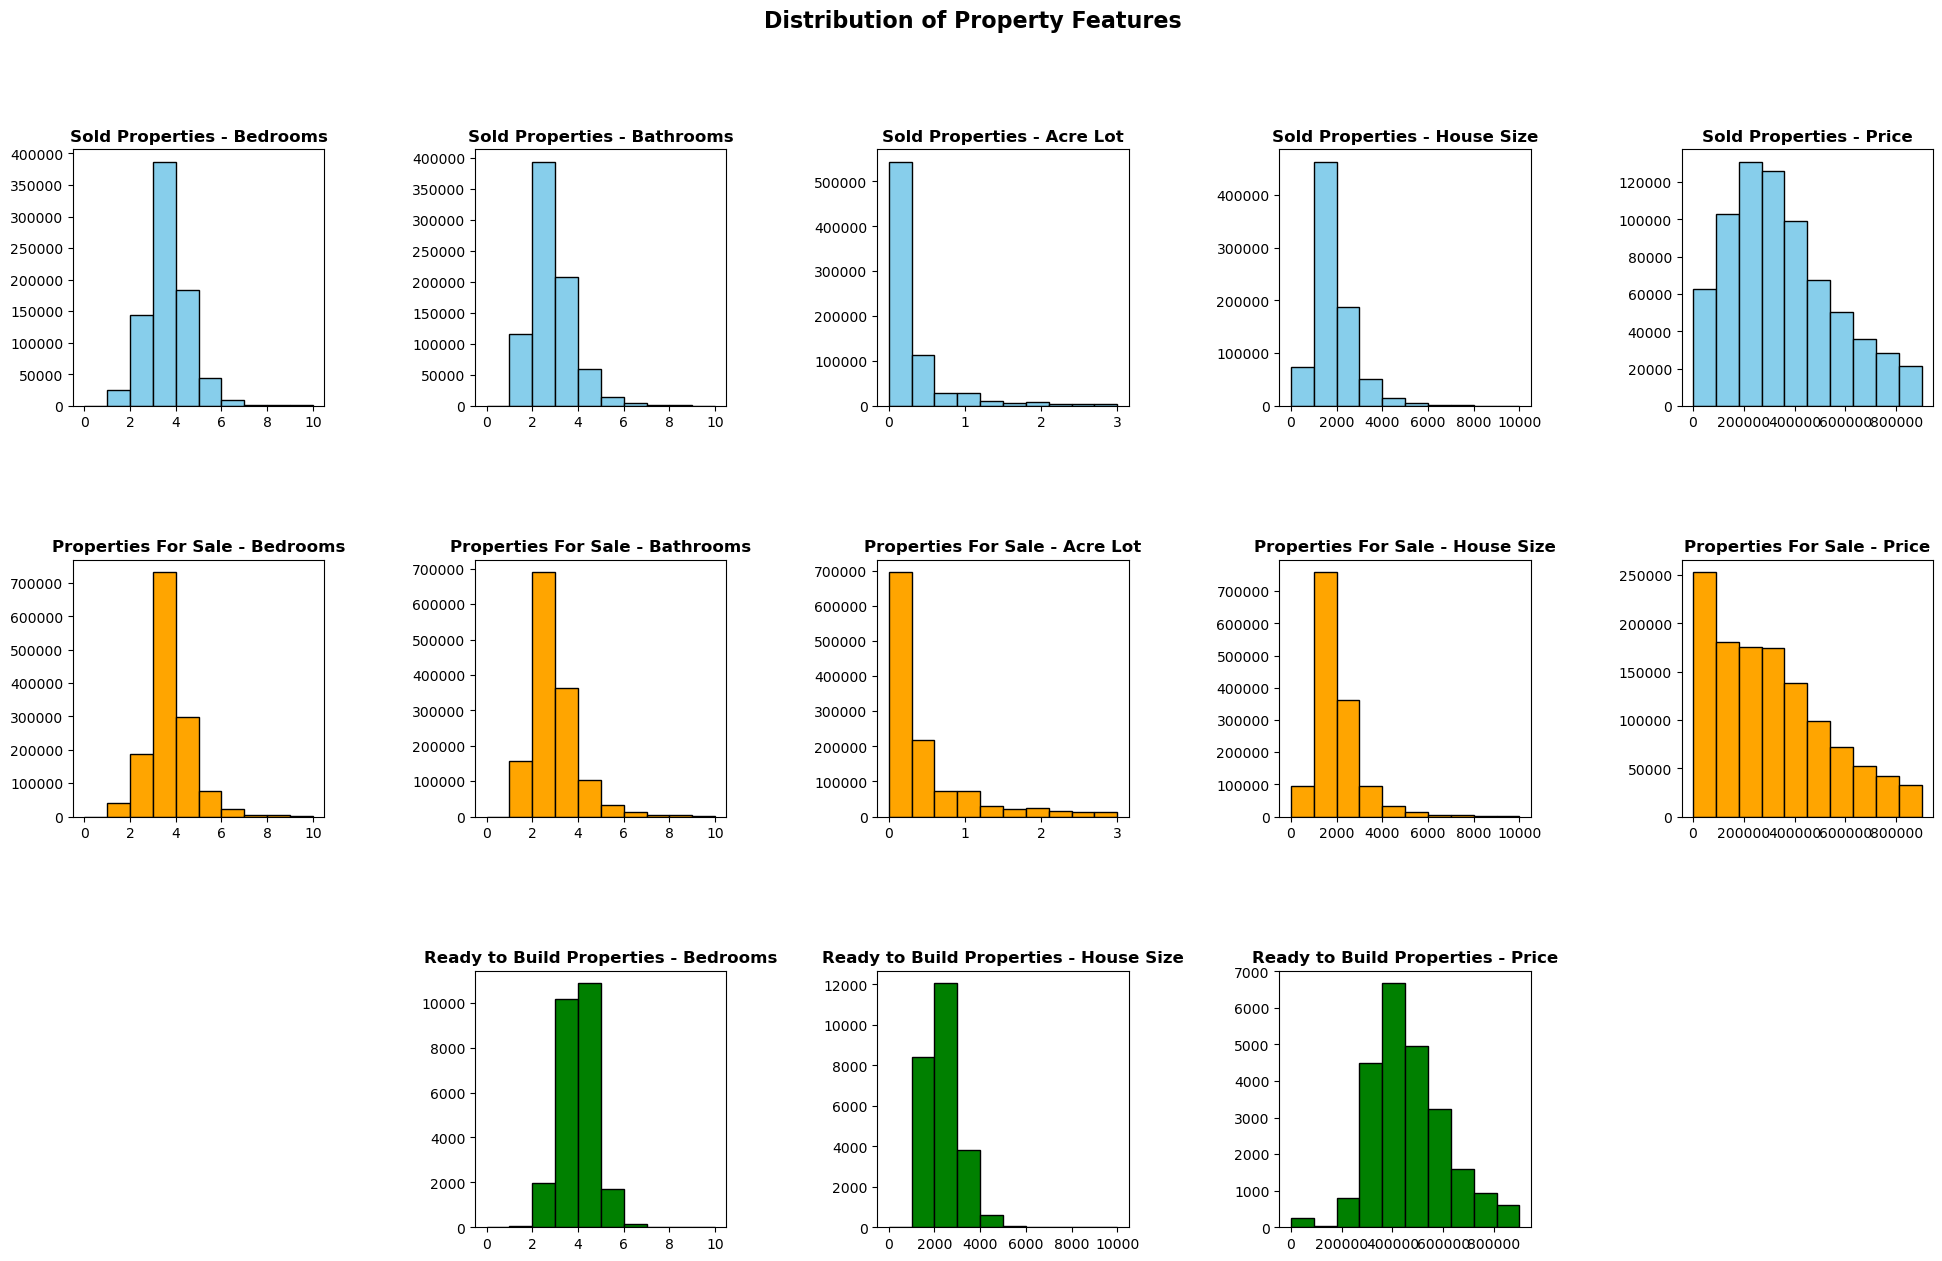

In [130]:
fig, axs = plt.subplots(3, 5, figsize=(24, 14))

ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[0, 2]
ax4 = axs[0, 3]
ax5 = axs[0, 4]
ax6 = axs[1, 0]
ax7 = axs[1, 1]
ax8 = axs[1, 2]
ax9 = axs[1, 3]
ax10 = axs[1, 4]
ax11 = axs[2, 1]
ax12 = axs[2, 2]
ax13 = axs[2, 3]
ax14 = axs[2, 4]
ax15 = axs[2, 0]

ax14.axis('off')
ax15.axis('off')

ax1.hist(df_sold_copy['bed'], bins=10, range=(0, 10), color='skyblue', edgecolor='black')
ax2.hist(df_sold_copy['bath'], bins=10, range=(0, 10), color='skyblue', edgecolor='black')
ax3.hist(df_sold_copy['acre_lot'], bins=10, range=(0, 3), color='skyblue', edgecolor='black')
ax4.hist(df_sold_copy['house_size'], bins=10, range=(0, 10000), color='skyblue', edgecolor='black')
ax5.hist(df_sold_copy['price'], bins=10, range=(0, 9e5), color='skyblue', edgecolor='black')

ax6.hist(df_for_sale_copy['bed'], bins=10, range=(0, 10), color='orange', edgecolor='black')
ax7.hist(df_for_sale_copy['bath'], bins=10, range=(0, 10), color='orange', edgecolor='black')
ax8.hist(df_for_sale_copy['acre_lot'], bins=10, range=(0, 3), color='orange', edgecolor='black')
ax9.hist(df_for_sale_copy['house_size'], bins=10, range=(0, 10000), color='orange', edgecolor='black')
ax10.hist(df_for_sale_copy['price'], bins=10, range=(0, 9e5), color='orange', edgecolor='black')

ax11.hist(df_ready_copy['bed'], bins=10, range=(0, 10), color='green', edgecolor='black')
ax12.hist(df_ready_copy['house_size'], bins=10, range=(0, 10000), color='green', edgecolor='black')
ax13.hist(df_ready_copy['price'], bins=10, range=(0, 9e5), color='green', edgecolor='black')

# Set main title and subtitles
fig.suptitle('Distribution of Property Features', fontsize=16, fontweight='bold')
ax1.set_title('Sold Properties - Bedrooms', fontweight='bold')
ax2.set_title('Sold Properties - Bathrooms', fontweight='bold')
ax3.set_title('Sold Properties - Acre Lot', fontweight='bold')
ax4.set_title('Sold Properties - House Size', fontweight='bold')
ax5.set_title('Sold Properties - Price', fontweight='bold')
ax6.set_title('Properties For Sale - Bedrooms', fontweight='bold')
ax7.set_title('Properties For Sale - Bathrooms', fontweight='bold')
ax8.set_title('Properties For Sale - Acre Lot', fontweight='bold')
ax9.set_title('Properties For Sale - House Size', fontweight='bold')
ax10.set_title('Properties For Sale - Price', fontweight='bold')
ax11.set_title('Ready to Build Properties - Bedrooms', fontweight='bold')
ax12.set_title('Ready to Build Properties - House Size', fontweight='bold')
ax13.set_title('Ready to Build Properties - Price', fontweight='bold')

plt.subplots_adjust(wspace=0.6)
plt.subplots_adjust(hspace=0.6)
plt.show()


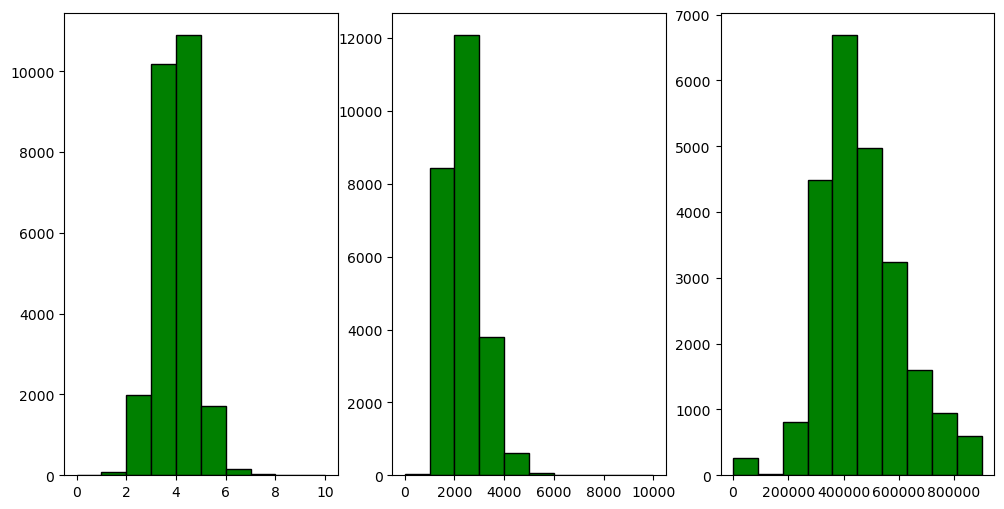

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

ax1.hist(df_ready_copy['bed'], bins=10, range= (0,10), color='green', edgecolor='black')
ax2.hist(df_ready_copy['house_size'], bins=10, range= (0,10000), color='green', edgecolor='black')
ax3.hist(df_ready_copy['price'], bins=10, range= (0,9e5), color='green', edgecolor='black')

plt.show()

## XGBoost

In [105]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the columns of interest
columns_of_interest = ['bed', 'bath', 'acre_lot', 'house_size']

# Split the data into features (X) and target variable (y)
X7 = df_sold_copy[columns_of_interest]
y7 = df_sold_copy['price']

# Split the data into training and testing sets
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model7 = xgb.XGBRegressor()
model7.fit(X_train7, y_train7)

# Make predictions on the test set
y_pred7 = model7.predict(X_test7)

# Evaluate the model
mae7 = mean_absolute_error(y_test7, y_pred7)
mse7 = mean_squared_error(y_test7, y_pred7)
rmse7 = mse7 ** 0.5
r27 = r2_score(y_test7, y_pred7)

# Output the evaluation metrics
print(f"Mean Absolute Error: {mae7}")
print(f"Mean Squared Error: {mse7}")
print(f"Root Mean Squared Error: {rmse7}")
print(f"R^2 Score: {r27}")


Mean Absolute Error: 262688.2590945267
Mean Squared Error: 512920615671.6344
Root Mean Squared Error: 716184.7636410834
R^2 Score: 0.1317867990449646


In [106]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the columns of interest
columns_of_interest = ['bed', 'bath', 'acre_lot', 'house_size']

# Split the data into features (X) and target variable (y)
X8 = df_for_sale_copy[columns_of_interest]
y8 = df_for_sale_copy['price']

# Split the data into training and testing sets
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model8 = xgb.XGBRegressor()
model8.fit(X_train8, y_train8)

# Make predictions on the test set
y_pred8 = model.predict(X_test8)

# Evaluate the model
mae8 = mean_absolute_error(y_test8, y_pred8)
mse8 = mean_squared_error(y_test8, y_pred8)
rmse8 = mse8 ** 0.5
r28 = r2_score(y_test8, y_pred8)

# Output the evaluation metrics
print(f"Mean Absolute Error: {mae8}")
print(f"Mean Squared Error: {mse8}")
print(f"Root Mean Squared Error: {rmse8}")
print(f"R^2 Score: {r28}")


Mean Absolute Error: 365994.6224268379
Mean Squared Error: 9184296107115.443
Root Mean Squared Error: 3030560.3618993373
R^2 Score: 0.05290635492746176


In [115]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Split the data into features (X) and target variable (y)
X9 = df_ready_copy[new_columns_of_interest]
y9 = df_ready_copy['price']

# Split the data into training and testing sets
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model9 = xgb.XGBRegressor()
model9.fit(X_train9, y_train9)

# Make predictions on the test set
y_pred9 = model9.predict(X_test9)

# Evaluate the model
mae9 = mean_absolute_error(y_test9, y_pred9)
mse9 = mean_squared_error(y_test9, y_pred9)
rmse9 = mse9 ** 0.5
r29 = r2_score(y_test9, y_pred9)

# Output the evaluation metrics
print(f"Mean Absolute Error: {mae9}")
print(f"Mean Squared Error: {mse9}")
print(f"Root Mean Squared Error: {rmse9}")
print(f"R^2 Score: {r29}")



Mean Absolute Error: 123201.83087335099
Mean Squared Error: 43434674881.1229
Root Mean Squared Error: 208409.87232164148
R^2 Score: 0.30939678213663124


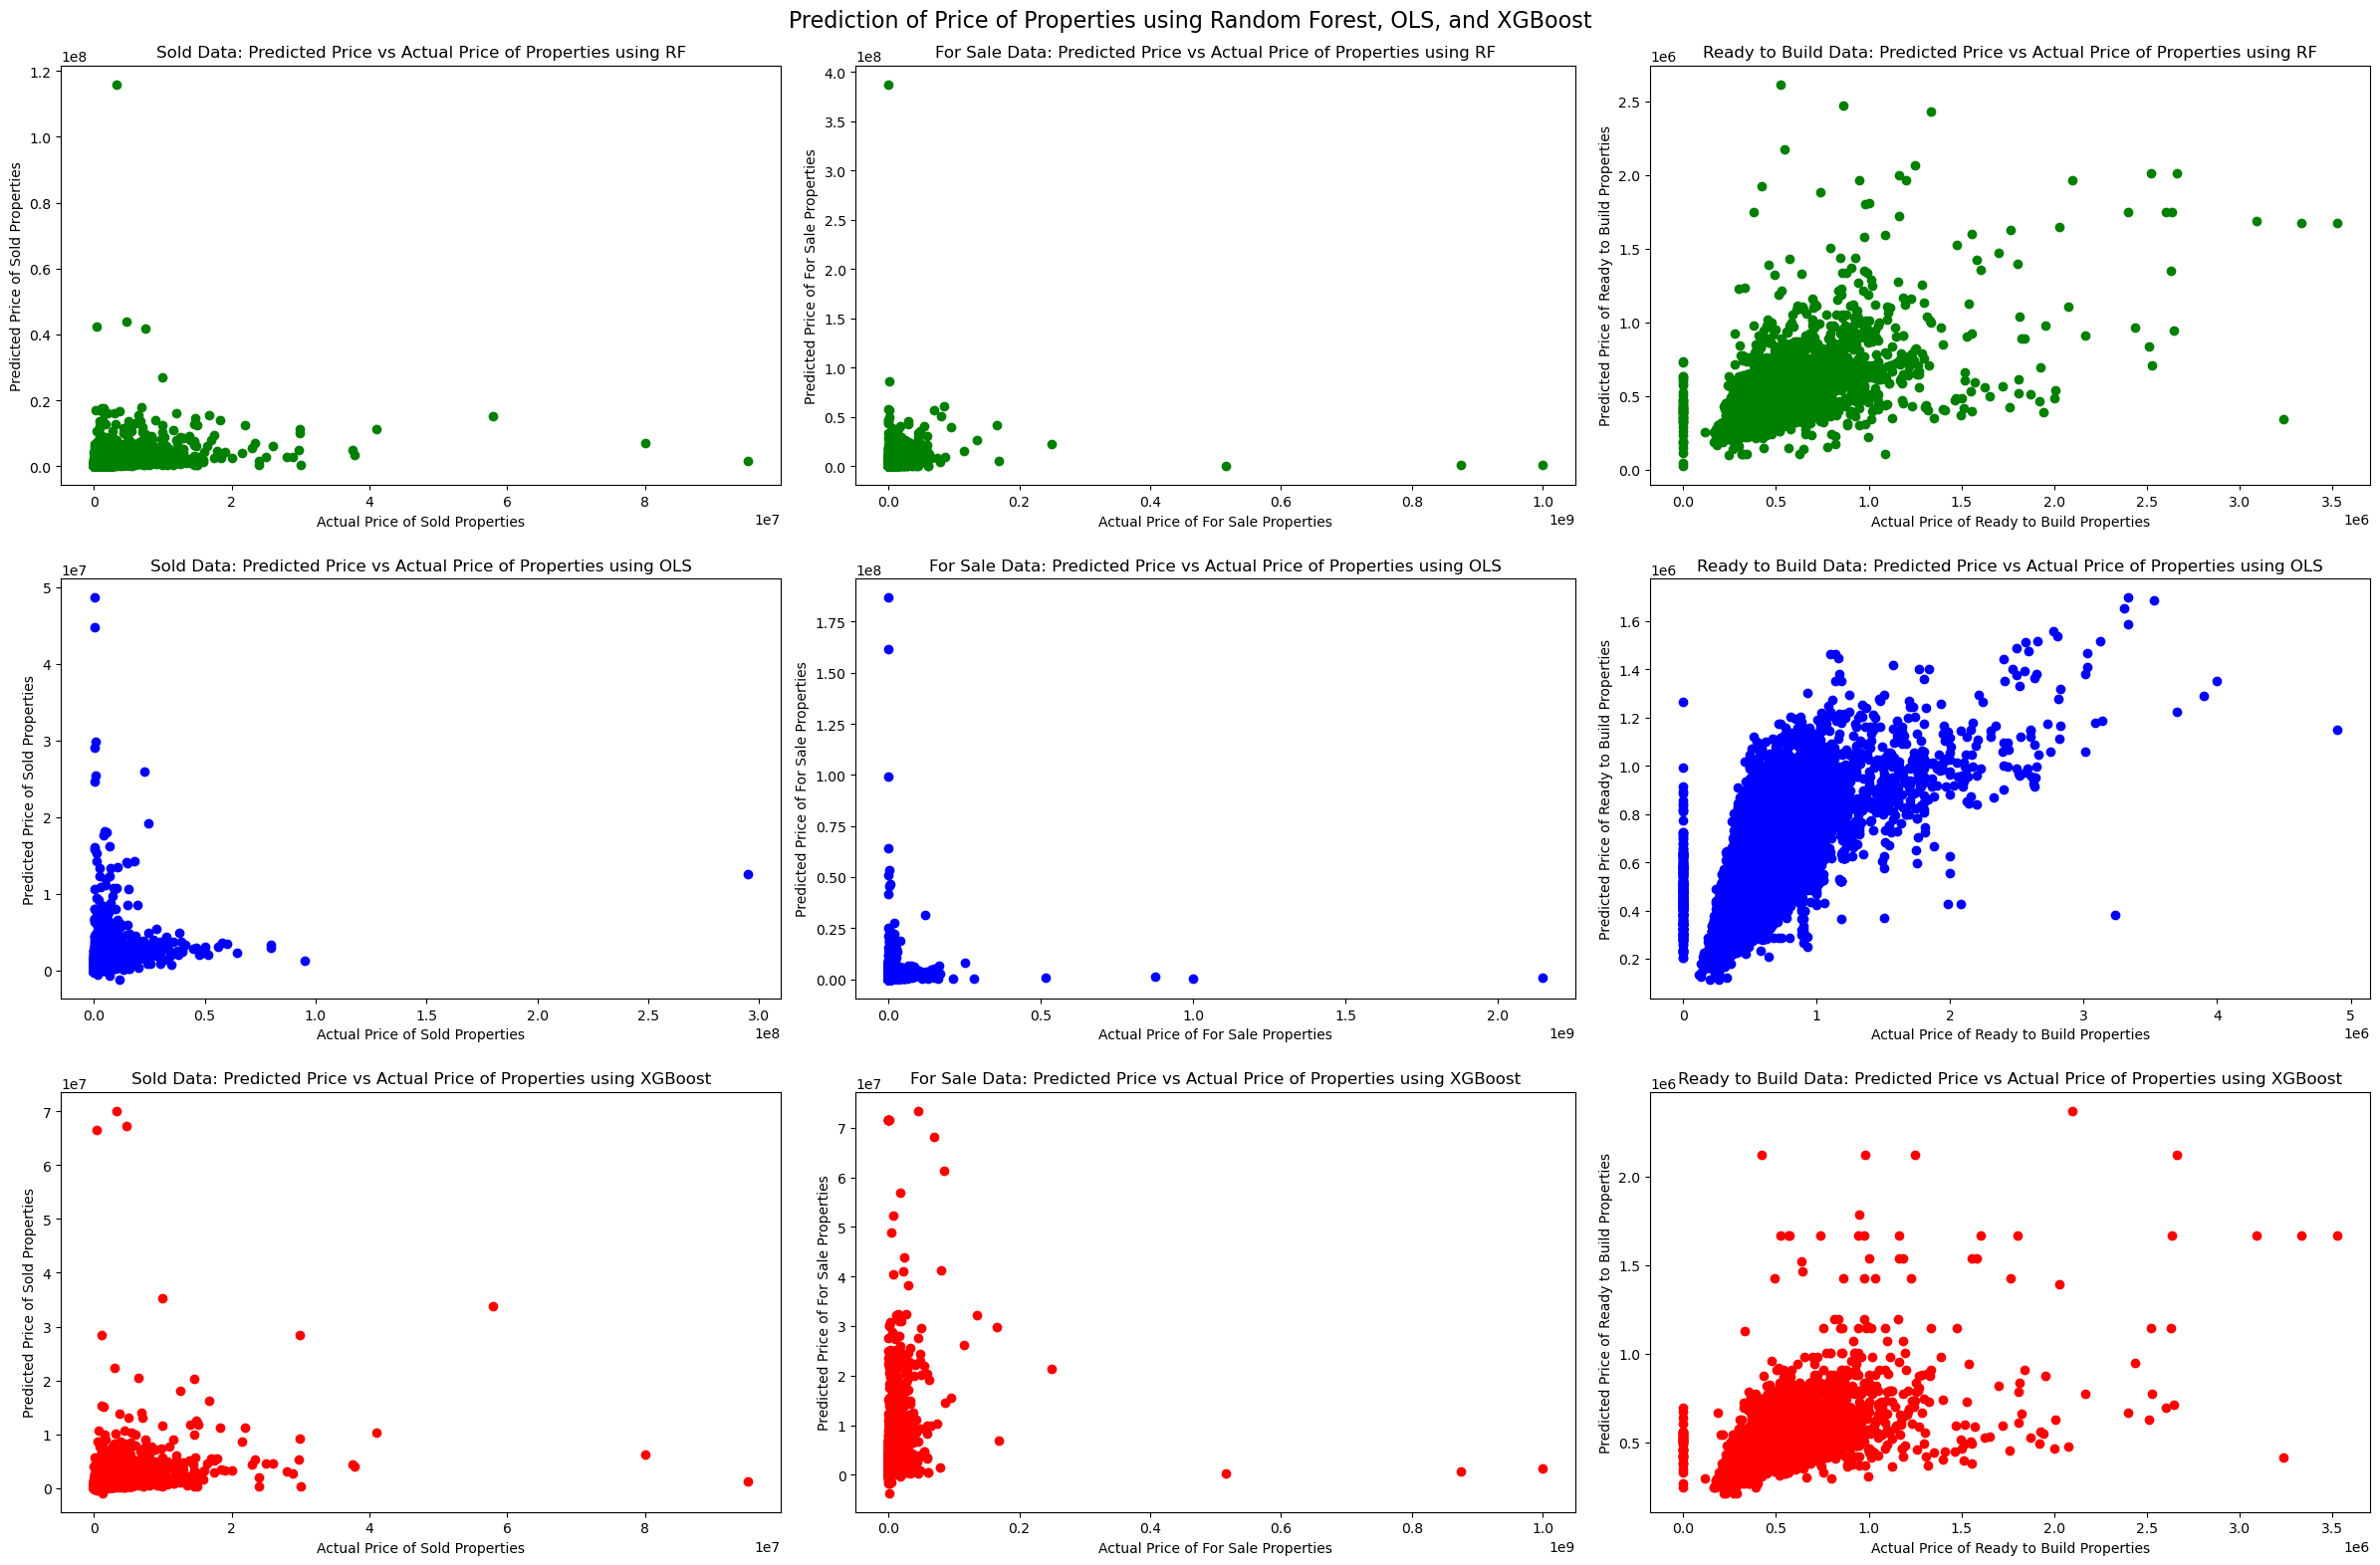

In [117]:
# Create a figure and 9 subplots
fig, axs = plt.subplots(3, 3, figsize=(24, 16))

# Access each subplot using indexing
ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[0, 2]
ax4 = axs[1, 0]
ax5 = axs[1, 1]
ax6 = axs[1, 2]
ax7 = axs[2, 0]
ax8 = axs[2, 1]
ax9 = axs[2, 2]

ax1.scatter(y_test1, y_pred1, color='green')
ax1.set_xlabel('Actual Price of Sold Properties')
ax1.set_ylabel('Predicted Price of Sold Properties')
ax1.set_title('Sold Data: Predicted Price vs Actual Price of Properties using RF')

ax2.scatter(y_test2, y_pred2, color='green')
ax2.set_xlabel('Actual Price of For Sale Properties')
ax2.set_ylabel('Predicted Price of For Sale Properties')
ax2.set_title('For Sale Data: Predicted Price vs Actual Price of Properties using RF')

ax3.scatter(y_test3, y_pred3, color='green')
ax3.set_xlabel('Actual Price of Ready to Build Properties')
ax3.set_ylabel('Predicted Price of Ready to Build Properties')
ax3.set_title('Ready to Build Data: Predicted Price vs Actual Price of Properties using RF')

ax4.scatter(y4, y4_pred, color='blue')
ax4.set_xlabel('Actual Price of Sold Properties')
ax4.set_ylabel('Predicted Price of Sold Properties')
ax4.set_title('Sold Data: Predicted Price vs Actual Price of Properties using OLS')

ax5.scatter(y5, y5_pred, color='blue')
ax5.set_xlabel('Actual Price of For Sale Properties')
ax5.set_ylabel('Predicted Price of For Sale Properties')
ax5.set_title('For Sale Data: Predicted Price vs Actual Price of Properties using OLS')

ax6.scatter(y6, y6_pred, color='blue')
ax6.set_xlabel('Actual Price of Ready to Build Properties')
ax6.set_ylabel('Predicted Price of Ready to Build Properties')
ax6.set_title('Ready to Build Data: Predicted Price vs Actual Price of Properties using OLS')

ax7.scatter(y_test7, y_pred7, color='red')
ax7.set_xlabel('Actual Price of Sold Properties')
ax7.set_ylabel('Predicted Price of Sold Properties')
ax7.set_title('Sold Data: Predicted Price vs Actual Price of Properties using XGBoost')

ax8.scatter(y_test8, y_pred8, color='red')
ax8.set_xlabel('Actual Price of For Sale Properties')
ax8.set_ylabel('Predicted Price of For Sale Properties')
ax8.set_title('For Sale Data: Predicted Price vs Actual Price of Properties using XGBoost')

ax9.scatter(y_test9, y_pred9, color='red')
ax9.set_xlabel('Actual Price of Ready to Build Properties')
ax9.set_ylabel('Predicted Price of Ready to Build Properties')
ax9.set_title('Ready to Build Data: Predicted Price vs Actual Price of Properties using XGBoost')

# Adjust the layout
# Customize each subplot as needed

# Show the figure
plt.suptitle('Prediction of Price of Properties using Random Forest, OLS, and XGBoost', fontsize=16)
plt.tight_layout()
plt.show()


In [122]:
def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate the mean absolute percentage error (MAPE) between the true and predicted values.
    
    Parameters:
    - y_true: array-like, true values
    - y_pred: array-like, predicted values
    
    Returns:
    - mape: float, mean absolute percentage error
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [121]:
print(mean_absolute_percentage_error(y_test1, y_pred1))
print(mean_absolute_percentage_error(y_test2, y_pred2))
print(mean_absolute_percentage_error(y_test3, y_pred3))
print(mean_absolute_percentage_error(y4, y4_pred))
print(mean_absolute_percentage_error(y5, y5_pred))
print(mean_absolute_percentage_error(y6, y6_pred))
print(mean_absolute_percentage_error(y_test7, y_pred7))
print(mean_absolute_percentage_error(y_test8, y_pred8))
print(mean_absolute_percentage_error(y_test9, y_pred9))


4206.548256768927
inf
inf
3088.4141854732225
inf
inf
3976.093305561843
inf
inf


In [112]:
print(len(X_test7), len(y_test7), len(y_pred7))
print(len(X_test3), len(y_test3), len(y_pred3))


160199 160199 160199
5003 5003 5003


In [109]:
y_pred7.size

160199

## Neural Network

In [ ]:
%conda install --quiet tensorflow


Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/adityasakariya/anaconda3

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.2.0        |            eigen           3 KB
    absl-py-1.4.0              |  py311hca03da5_0         240 KB
    arrow-cpp-11.0.0           |       he3f21e0_2         6.7 MB
    astunparse-1.6.3           |             py_0          17 KB
    aws-sdk-cpp-1.8.185        |       h4a942e0_0         1.6 MB
    blinker-1.6.2              |  py311hca03da5_0          35 KB
    ca-certificates-2024.3.11  |       hca03da5_0      

In [ ]:
%conda install --name <your_env_name> --yes --channel conda-forge tensorflow


/bin/bash: your_env_name: No such file or directory



Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:

# Data Preprocessing Steps
categorical_features = ['state']
numerical_features = ['bed', 'bath', 'acre_lot', 'house_size']

# Imputation and scaling/encoding
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)])

X = df_sold[numerical_features + categorical_features]
y = df_sold['price']

# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_prepared = preprocessor.fit_transform(X_train)
X_val_prepared = preprocessor.transform(X_val)

# Neural Network Model
modeln = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_prepared.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

modeln.compile(optimizer='adam', loss='mean_squared_error')
modeln.fit(X_train_prepared, y_train, epochs=10, validation_data=(X_val_prepared, y_val))

Epoch 1/10
20298/20298 ━━━━━━━━━━━━━━━━━━━━ 10s 470us/step - loss: nan - val_loss: nan
Epoch 2/10
20298/20298 ━━━━━━━━━━━━━━━━━━━━ 9s 466us/step - loss: nan - val_loss: nan
Epoch 3/10
20298/20298 ━━━━━━━━━━━━━━━━━━━━ 9s 454us/step - loss: nan - val_loss: nan
Epoch 4/10
20298/20298 ━━━━━━━━━━━━━━━━━━━━ 9s 457us/step - loss: nan - val_loss: nan
Epoch 5/10
20298/20298 ━━━━━━━━━━━━━━━━━━━━ 9s 447us/step - loss: nan - val_loss: nan
Epoch 6/10
20298/20298 ━━━━━━━━━━━━━━━━━━━━ 9s 448us/step - loss: nan - val_loss: nan
Epoch 7/10
20298/20298 ━━━━━━━━━━━━━━━━━━━━ 9s 455us/step - loss: nan - val_loss: nan
Epoch 8/10
20298/20298 ━━━━━━━━━━━━━━━━━━━━ 11s 528us/step - loss: nan - val_loss: nan
Epoch 9/10
20298/20298 ━━━━━━━━━━━━━━━━━━━━ 10s 512us/step - loss: nan - val_loss: nan
Epoch 10/10
20298/20298 ━━━━━━━━━━━━━━━━━━━━ 9s 463us/step - loss: nan - val_loss: nan


In [ ]:



# Predicting with the model
y_pred = modeln.predict(X_val)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Using numpy sqrt function to compute the square root
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)


ModuleNotFoundError: No module named 'sklearn'

In [ ]:

y_pred = modeln.predict(X_train)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Using numpy sqrt function to compute the square root
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)